In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def adc2R(c, R=19e3, Vref=2.5):
    s = Vref/4096
    V = s*c
    rT = V*R/(Vref-V)
    return rT

In [3]:
def R2adc(r, R=19e3, Vref=2.5):
    V = Vref*r/(r+R)
    adc = np.floor(4096*V/Vref)
    return adc

In [4]:
def R2T(R, beta=3892.0, T0=25.0, R0=5e3):
    T0 += 273.15
    r_inf = R0*np.exp(-beta/T0)
    T = beta/np.log(R/r_inf)
    return T - 273.15

In [5]:
def T2R(T, beta=3892.0, T0=25.0, R0=5e3):
    T0 += 273.15
    r_inf = R0*np.exp(-beta/T0)
    T_K = T + 273.15
    return r_inf*np.exp(beta/T_K)

In [16]:
def adc2T(c):
    return R2T(adc2R(c))

def T2adc(T):
    return R2adc(T2R(T))

In [19]:
T2adc(15)

1199.0

In [6]:
dataRef = np.loadtxt('../references/Littelfuse_Leaded_Thermistors_Interchangeable_Thermistors_PR502J2_RT_Table.csv', delimiter=',')

Text(0,0.5,'Temperature [$^{\\circ}$C]')

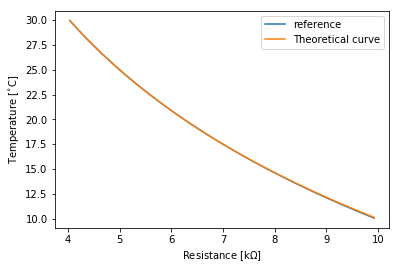

In [7]:
Temp = [10, 30]
sel = np.logical_and(dataRef[:,0]>Temp[0], dataRef[:,0]<Temp[1])
x = dataRef[:,1][sel]
plt.plot(x*1e-3, dataRef[:,0][sel], label='reference')
plt.plot(x*1e-3, R2T(x), label='Theoretical curve')

plt.legend(loc='best')
plt.xlabel(r'Resistance [k$\Omega$]')
plt.ylabel(r'Temperature [$^{\circ}$C]')

Text(0,0.5,'ADC counts')

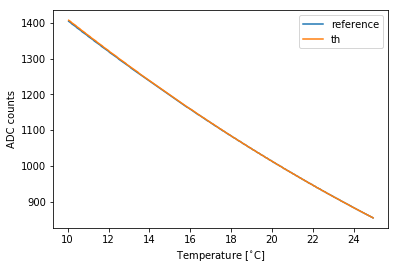

In [9]:
Temp = [10, 25]
sel = np.logical_and(dataRef[:,0]>Temp[0], dataRef[:,0]<Temp[1])
x = dataRef[:,0][sel]
adc = R2adc(dataRef[:,1][sel])
plt.plot(x, adc, label='reference')
plt.plot(x, R2adc(T2R(x)), label='th')

plt.legend(loc='best')
plt.xlabel(r'Temperature [$^{\circ}$C]')
plt.ylabel('ADC counts')

In [14]:
R2T(adc2R(900))

23.460791417844803

In [ ]:
x